In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

In [38]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


Couple of important observations:
1. **EmployeeCount**: All values are 1
2. **StandardHours**: All values are 80

These columns have no relavant information for our purpose. So we can drop these feature columns from the dataset.

# Step 1: Perform EDA 

In [ ]:
print("The dimensions of the data are:", df.shape[0], "rows and", df.shape[1], "columns") # Displaying the dimensions of the dataset
print("Insights: This indicates that the dataset has", df.shape[0], "datapoints and", df.shape[1], "features.")

print(df.info()) # Gives the datatype of values in each column

In [ ]:
print(df.isnull().any()) # returns True if there are any null values in the dataset wrt a specific feature, else returns False

In [ ]:

print(df.iloc[0]) # Displays the values of the first row of the dataset

Insights: 
1. There are no null values in any of the datapoints.
2. The dataset is rich in the number of features per datapoint, giving us vital information about the employees


In [ ]:
num_col = list(df.describe().columns) # includes columns with numeric data only; "df.columns" gives all the columns in the dataset
to_remove = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
col_numerical = [col for col in num_col if col not in to_remove] # includes only relavant columns with numeric data
col_categorical = list(set(df.columns).difference(num_col)) # includes columns with non-numeric data

In [47]:
print("Total number of numerical columns:", len(num_col))
print("Total number of relavent numerical columns: ", len(col_numerical))
print("Total number of categorical columns: ", len(col_categorical))

Total number of numerical columns: 26
Total number of relavent numerical columns:  23
Total number of categorical columns:  9


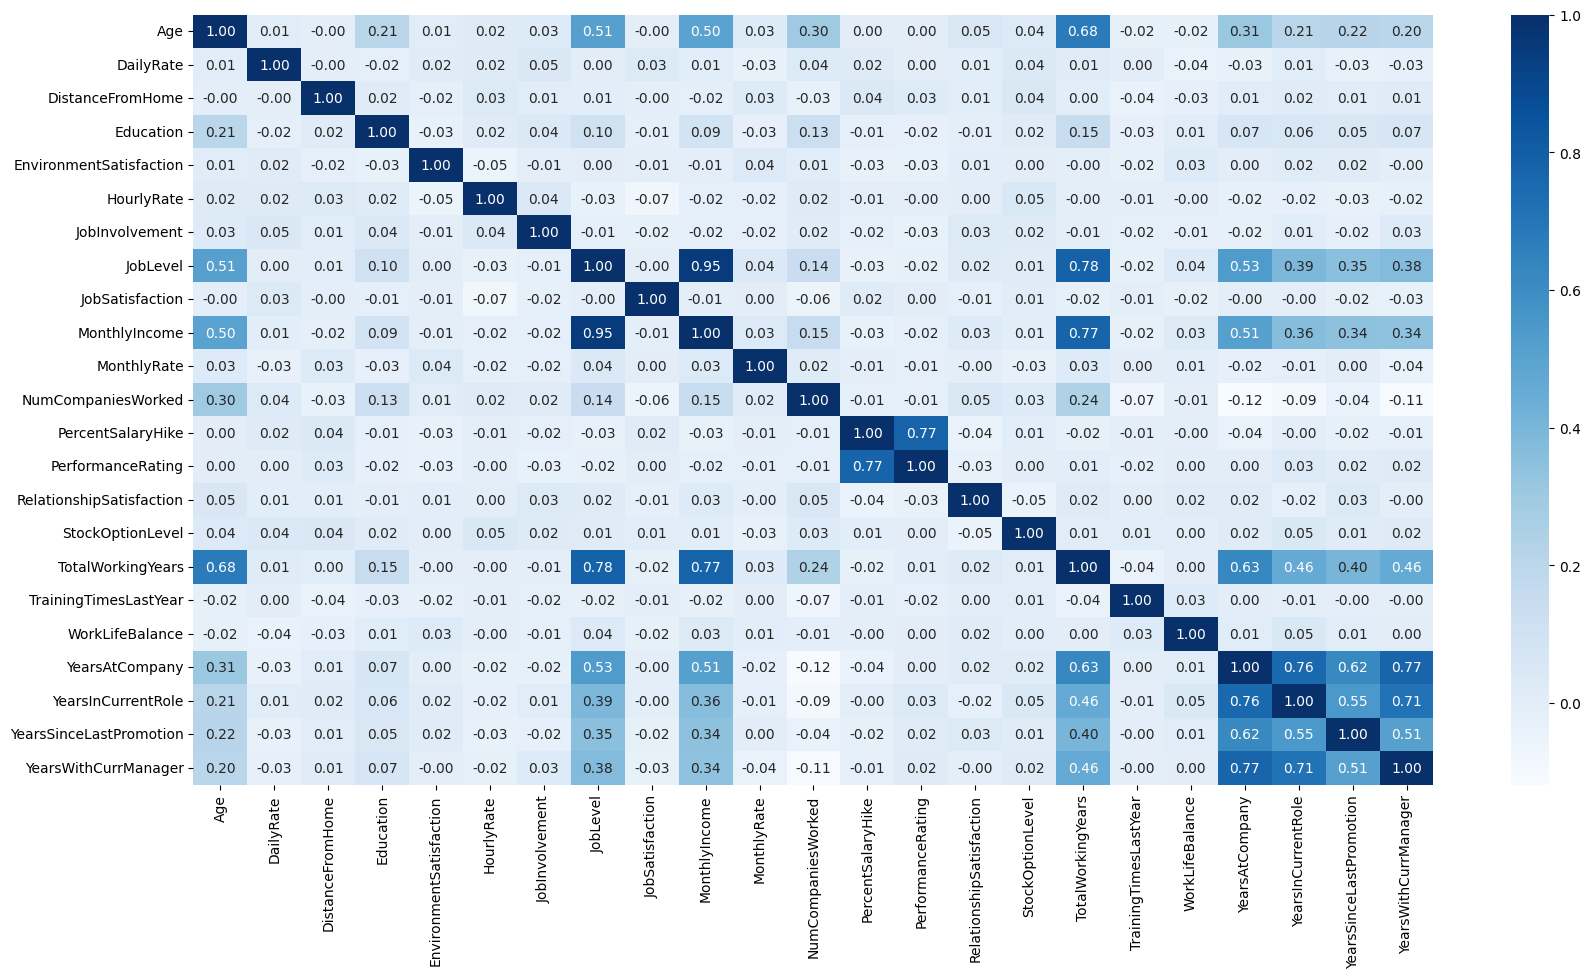

In [70]:
df[col_numerical].corr()
plt.figure(figsize=(20,10))
sns.heatmap(df[col_numerical].corr(), annot=True,cmap="Blues", fmt=".2f");

<Axes: >

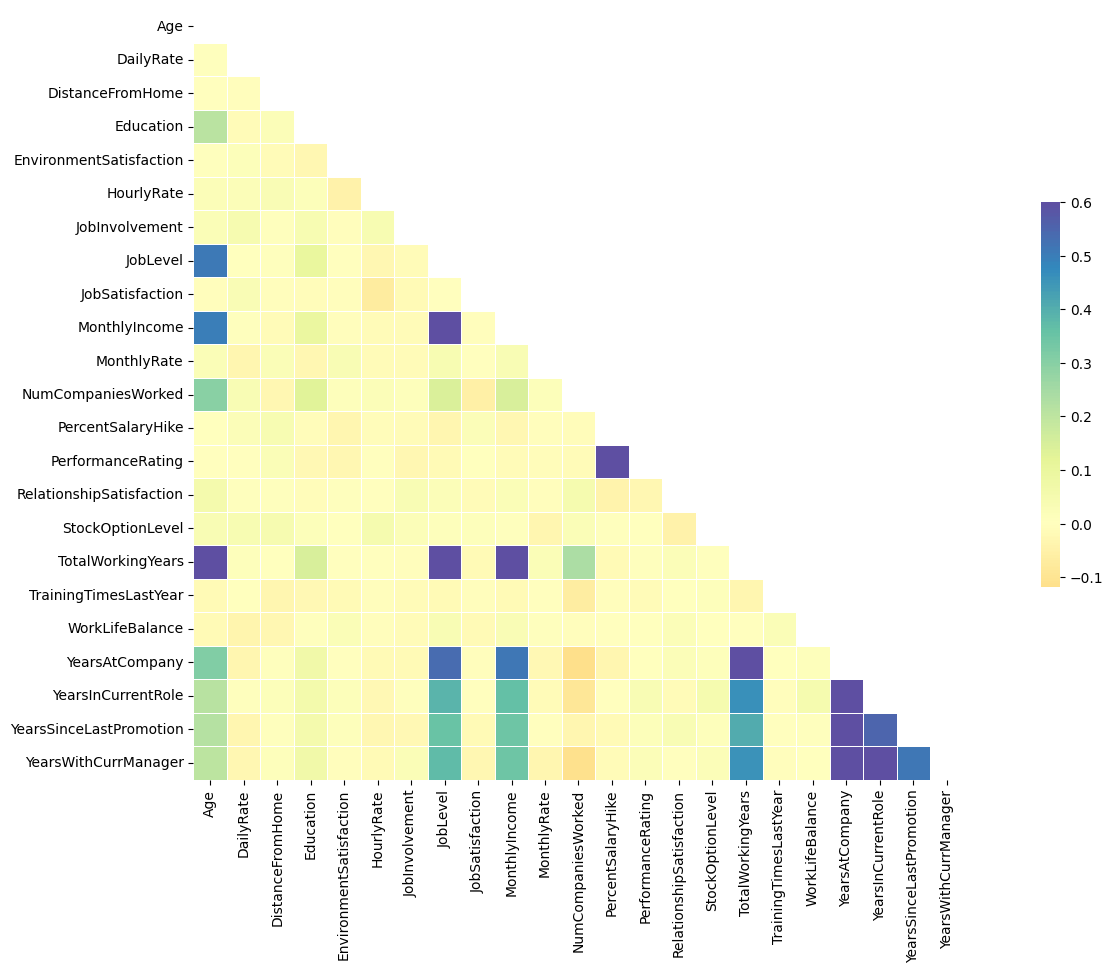

In [78]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(df[col_numerical].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df[col_numerical].corr(),  mask=mask,cmap='Spectral',vmax=0.6,  square=True,center=0, linewidths=0.5, cbar_kws={'shrink': 0.5})